<a href="https://colab.research.google.com/github/SrujanEppalapally/Real-Time-Stock-Price-Prediction/blob/main/NSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nsepython
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from nsepython import*


In [ ]:
def equity_history(symbol,series,start_date,end_date):
    payload = nsefetch("https://www.nseindia.com/api/historical/cm/equity?symbol="+symbol+"&series=[%22"+series+"%22]&from="+start_date+"&to="+end_date+"")
    return pd.DataFrame.from_records(payload["data"])

In [ ]:
symbol = "SBIN"
series = "EQ"
start_date = "08-06-2021"
end_date ="14-06-2021"
Print_data  = equity_history(symbol,series,start_date,end_date)
print(Print_data)

                        _id CH_SYMBOL CH_SERIES CH_MARKET_TYPE  \
0  63d7a40f3aa4bc0006fce1b1      SBIN        EQ              N   
1  63d7a3ffb726b40007af6585      SBIN        EQ              N   
2  63d7a3f006404c0006d94d31      SBIN        EQ              N   
3  63d7a3e191e6ce00070a9f27      SBIN        EQ              N   
4  63d7a3d2ce536a0007460775      SBIN        EQ              N   

   CH_TRADE_HIGH_PRICE  CH_TRADE_LOW_PRICE  CH_OPENING_PRICE  \
0               432.45              416.70            427.00   
1               435.50              425.25            434.85   
2               433.30              422.40            424.90   
3               432.30              418.20            427.50   
4               432.50              424.00            432.25   

   CH_CLOSING_PRICE  CH_LAST_TRADED_PRICE  CH_PREVIOUS_CLS_PRICE  ...  \
0            430.35                430.00                 429.60  ...   
1            429.60                429.40                 432.25  ...   

In [ ]:
from nsepython import *
logging.basicConfig(level=logging.DEBUG)

def equity_history_virgin(symbol,series,start_date,end_date):
    url="https://www.nseindia.com/api/historical/cm/equity?symbol="+symbol+"&series=[%22"+series+"%22]&from="+str(start_date)+"&to="+str(end_date)+""
    payload = nsefetch(url)
    return pd.DataFrame.from_records(payload["data"])

In [ ]:
#We are getting the input in text. So it is being converted to Datetime object from String.
start_date = datetime.datetime.strptime(start_date, "%d-%m-%Y")
end_date = datetime.datetime.strptime(end_date, "%d-%m-%Y")
logging.info("Starting Date: "+str(start_date))
logging.info("Ending Date: "+str(end_date))

#We are calculating the difference between the days
diff = end_date-start_date

logging.info("Total Number of Days: "+str(diff.days))
logging.info("Total FOR Loops in the program: "+str(int(diff.days/40)))
logging.info("Remainder Loop: " + str(diff.days-(int(diff.days/40)*40)))

In [ ]:
total=pd.DataFrame()
for i in range (0,int(diff.days/40)):

    temp_date = (start_date+datetime.timedelta(days=(40))).strftime("%d-%m-%Y")
    start_date = datetime.datetime.strftime(start_date, "%d-%m-%Y")

    logging.info("Loop = "+str(i))
    logging.info("====")
    logging.info("Starting Date: "+str(start_date))
    logging.info("Ending Date: "+str(temp_date))
    logging.info("====")

    total=total.append(equity_history_virgin(symbol,series,start_date,temp_date))

    logging.info("Length of the Table: "+ str(len(total)))

    #Preparation for the next loop
    start_date = datetime.datetime.strptime(temp_date, "%d-%m-%Y")


start_date = datetime.datetime.strftime(start_date, "%d-%m-%Y")
end_date = datetime.datetime.strftime(end_date, "%d-%m-%Y")

logging.info("End Loop")
logging.info("====")
logging.info("Starting Date: "+str(start_date))
logging.info("Ending Date: "+str(end_date))
logging.info("====")

total=total.append(equity_history_virgin(symbol,series,start_date,end_date))

logging.info("Finale")
logging.info("Length of the Total Dataset: "+ str(len(total)))
payload = total.iloc[::-1].reset_index(drop=True)
print(payload)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
from nsepython import *
logging.basicConfig(level=logging.INFO)

symbol = "SBIN"
series = "EQ"
start_date = "08-01-2023"
end_date ="14-06-2024"
print(equity_history(symbol,series,start_date,end_date))
Stock_data = equity_history(symbol,series,start_date,end_date)


                          _id CH_SYMBOL CH_SERIES CH_MARKET_TYPE  \
0    6633807e069784076a1ea1a8      SBIN        EQ              N   
1    6634d1ff7e95cfc3299422a3      SBIN        EQ              N   
2    6638c67e2aa5517ac06e8aeb      SBIN        EQ              N   
3    663a17ff9ab26689805f76c3      SBIN        EQ              N   
4    663b697fb05680891c26c41d      SBIN        EQ              N   
..                        ...       ...       ...            ...   
355  63ea26627f00b10007473372      SBIN        EQ              N   
356  63eb77e02dd7bc0006b22ed6      SBIN        EQ              N   
357  63ecc95bf3c7a10007961949      SBIN        EQ              N   
358  63ee1ae0e9845a00077c1c4a      SBIN        EQ              N   
359  642835da7ae9d0000711667f      SBIN        EQ              N   

     CH_TRADE_HIGH_PRICE  CH_TRADE_LOW_PRICE  CH_OPENING_PRICE  \
0                 833.90              825.00            826.90   
1                 836.20              820.00       

In [ ]:
Stock_data = pd.DataFrame(Stock_data)

In [ ]:
Stock_data.isna().sum()

_id                        0
CH_SYMBOL                  0
CH_SERIES                  0
CH_MARKET_TYPE             0
CH_TRADE_HIGH_PRICE        0
CH_TRADE_LOW_PRICE         0
CH_OPENING_PRICE           0
CH_CLOSING_PRICE           0
CH_LAST_TRADED_PRICE       0
CH_PREVIOUS_CLS_PRICE      0
CH_TOT_TRADED_QTY          0
CH_TOT_TRADED_VAL          0
CH_52WEEK_HIGH_PRICE       0
CH_52WEEK_LOW_PRICE        0
CH_TOTAL_TRADES            0
CH_ISIN                    0
CH_TIMESTAMP               0
TIMESTAMP                  0
createdAt                  0
updatedAt                  0
__v                        0
SLBMH_TOT_VAL            360
VWAP                       0
mTIMESTAMP                 0
CA                       358
dtype: int64

In [ ]:
Stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    360 non-null    object 
 1   CH_SYMBOL              360 non-null    object 
 2   CH_SERIES              360 non-null    object 
 3   CH_MARKET_TYPE         360 non-null    object 
 4   CH_TRADE_HIGH_PRICE    360 non-null    float64
 5   CH_TRADE_LOW_PRICE     360 non-null    float64
 6   CH_OPENING_PRICE       360 non-null    float64
 7   CH_CLOSING_PRICE       360 non-null    float64
 8   CH_LAST_TRADED_PRICE   360 non-null    float64
 9   CH_PREVIOUS_CLS_PRICE  360 non-null    float64
 10  CH_TOT_TRADED_QTY      360 non-null    int64  
 11  CH_TOT_TRADED_VAL      360 non-null    float64
 12  CH_52WEEK_HIGH_PRICE   360 non-null    float64
 13  CH_52WEEK_LOW_PRICE    360 non-null    float64
 14  CH_TOTAL_TRADES        360 non-null    int64  
 15  CH_ISI

In [ ]:
Stock_data.drop(['_id', 'CH_SYMBOL', 'CH_SERIES', 'CH_MARKET_TYPE', 'CH_ISIN', 'CH_TIMESTAMP', 'TIMESTAMP', 'createdAt', 'updatedAt', '__v', 'SLBMH_TOT_VAL', 'mTIMESTAMP', 'CA'], axis=1, inplace=True)

In [ ]:
# Split data into features and target
X = Stock_data.drop(['CH_CLOSING_PRICE'], axis=1)
y = Stock_data['CH_CLOSING_PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 394839.5938 - val_loss: 406704.7812
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 393817.5000 - val_loss: 405657.6562
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 392790.8750 - val_loss: 404472.4688
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 391588.5625 - val_loss: 402966.2188
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 390018.7500 - val_loss: 401015.6250
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 387986.5938 - val_loss: 398495.0312
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 385314.7188 - val_loss: 395305.7812
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 381840.7188 - val_loss: 391257.9375
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 377642.4375 - val_loss: 386194.1875
Epoch 10/100
8/8 [==================

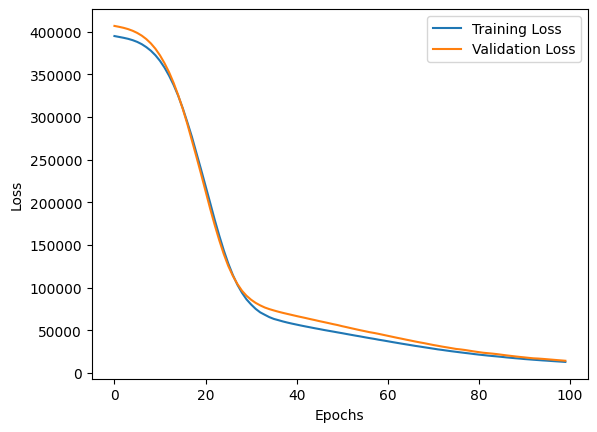

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test data
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

# Predict future closing price and VWAP
predictions = model.predict(X_test_scaled)


3/3 [==============================] - 0s 4ms/step - loss: 12835.1328
Test Loss: 12835.1328125
3/3 [==============================] - 0s 4ms/step


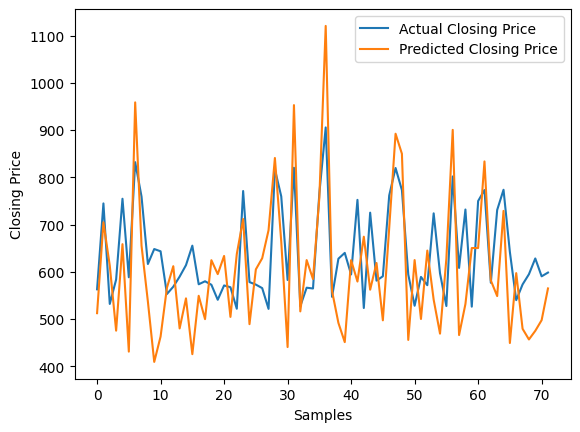

In [ ]:
# Plot predicted vs actual closing price
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(predictions, label='Predicted Closing Price')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [ ]:
y_test

224    562.95
42     744.80
285    532.10
302    583.60
56     754.70
        ...  
199    573.30
334    594.90
93     628.30
198    590.50
197    598.45
Name: CH_CLOSING_PRICE, Length: 72, dtype: float64

In [ ]:
predictions

array([[ 512.50287],
       [ 704.7914 ],
       [ 613.0934 ],
       [ 475.5173 ],
       [ 658.55963],
       [ 431.12338],
       [ 958.6542 ],
       [ 655.48535],
       [ 537.19073],
       [ 409.32547],
       [ 463.03207],
       [ 566.3758 ],
       [ 611.9632 ],
       [ 480.24185],
       [ 543.8156 ],
       [ 425.7369 ],
       [ 549.3068 ],
       [ 499.8641 ],
       [ 624.6363 ],
       [ 595.1877 ],
       [ 633.6215 ],
       [ 504.5903 ],
       [ 637.59674],
       [ 711.83856],
       [ 489.24356],
       [ 605.1647 ],
       [ 628.8034 ],
       [ 688.08026],
       [ 840.9708 ],
       [ 664.066  ],
       [ 440.79547],
       [ 952.8692 ],
       [ 516.2694 ],
       [ 624.8634 ],
       [ 584.7555 ],
       [ 757.0271 ],
       [1120.4829 ],
       [ 559.347  ],
       [ 491.92474],
       [ 451.22208],
       [ 624.7575 ],
       [ 579.4404 ],
       [ 674.3366 ],
       [ 562.15155],
       [ 618.8028 ],
       [ 497.37216],
       [ 693.1381 ],
       [ 892.